In [7]:
import os, pickle
import numpy as np 
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC
from xgboost import XGBClassifier
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [8]:
input_cols = [
            'LittleFingerForce',
            'MiddleFingerForce',
            'ThumbFingerForce',
            'PalmForce'
            ]

output_col = ['IsParkinson']

In [9]:
df = pd.read_csv('datasets/data-tabular.csv')
df

,LittleFingerForce,MiddleFingerForce,ThumbFingerForce,PalmForce,IsParkinson
0,44.55,44.11,32.71,1.23,0.0
1,-19.91,36.19,20.77,10.45,0.0
2,19.46,37.17,30.73,26.26,0.0
3,25.65,14.92,43.86,13.27,0.0
4,2.90,23.25,38.86,11.34,0.0
...,...,...,...,...,...
1995,84.01,32.01,70.71,65.60,1.0
1996,54.73,66.13,68.78,61.03,1.0
1997,54.47,71.86,69.37,86.36,1.0
1998,84.52,42.31,63.31,45.15,1.0


In [10]:
X, Y = df[input_cols].values, df[output_col].values.ravel()
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [11]:
# Random Forest Classifier
rfc = RandomForestClassifier(
                            n_estimators=100, 
                            random_state=42
                            )
rfc.fit(X_train, Y_train)
print("Random Forest Classifier Trained")

# XGBoost Classifier
xgb = XGBClassifier(
                    n_estimators=100,   
                    random_state=42
                    )
xgb.fit(X_train, Y_train)
print("XGBoost Classifier Trained")

# Support Vector Machine

svc = SVC(
        kernel='linear',
        random_state=42
        )
svc.fit(X_train, Y_train)
print("Support Vector Machine Trained")
# KNN Classifier

knn = KNeighborsClassifier(
                            n_neighbors=5,
                            metric='minkowski',
                            p=2
                            )
knn.fit(X_train, Y_train)
print("KNN Classifier Trained")

Random Forest Classifier Trained
XGBoost Classifier Trained
Support Vector Machine Trained
KNN Classifier Trained


In [12]:
P_rfc = rfc.predict(X_test)
P_xgb = xgb.predict(X_test)
P_svc = svc.predict(X_test)
P_knn = knn.predict(X_test)

In [13]:
print("Classification Report - Random Forest Classifier")
print(classification_report(Y_test, P_rfc, target_names=['No Parkinson', 'Parkinson']))

print("\nClassification Report - XGBoost Classifier")
print(classification_report(Y_test, P_xgb, target_names=['No Parkinson', 'Parkinson']))

print("\nClassification Report - Support Vector Machine")
print(classification_report(Y_test, P_svc, target_names=['No Parkinson', 'Parkinson']))

print("\nClassification Report - KNN Classifier")
print(classification_report(Y_test, P_knn, target_names=['No Parkinson', 'Parkinson']))

Classification Report - Random Forest Classifier
              precision    recall  f1-score   support

No Parkinson       0.99      1.00      0.99       199
   Parkinson       1.00      0.99      0.99       201

    accuracy                           0.99       400
   macro avg       0.99      0.99      0.99       400
weighted avg       0.99      0.99      0.99       400


Classification Report - XGBoost Classifier
              precision    recall  f1-score   support

No Parkinson       0.99      0.99      0.99       199
   Parkinson       0.99      0.99      0.99       201

    accuracy                           0.99       400
   macro avg       0.99      0.99      0.99       400
weighted avg       0.99      0.99      0.99       400


Classification Report - Support Vector Machine
              precision    recall  f1-score   support

No Parkinson       0.99      1.00      0.99       199
   Parkinson       1.00      0.99      0.99       201

    accuracy                           0.

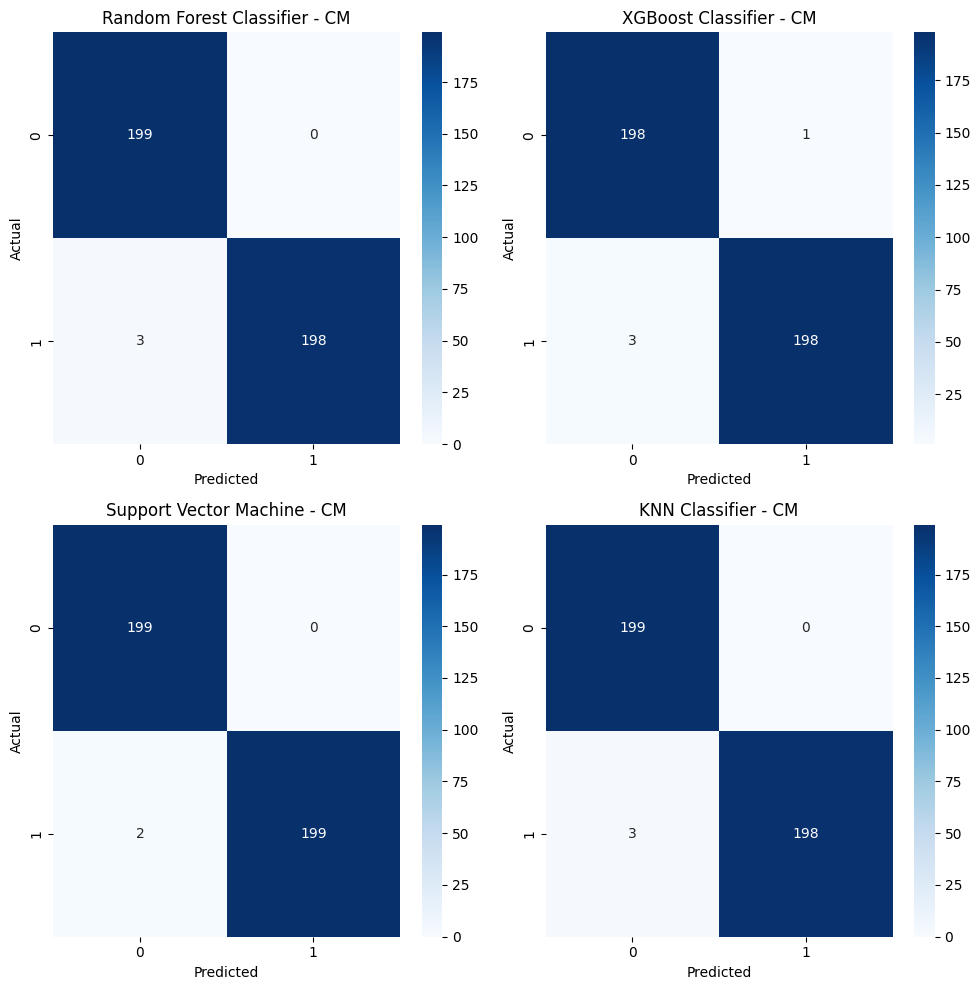

In [14]:
cm1 = confusion_matrix(Y_test, P_rfc)
cm2 = confusion_matrix(Y_test, P_xgb)
cm3 = confusion_matrix(Y_test, P_svc)
cm4 = confusion_matrix(Y_test, P_knn)

plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Classifier - CM')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(2, 2, 2)
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues')
plt.title('XGBoost Classifier - CM')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(2, 2, 3)
sns.heatmap(cm3, annot=True, fmt='d', cmap='Blues')
plt.title('Support Vector Machine - CM')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(2, 2, 4)
sns.heatmap(cm4, annot=True, fmt='d', cmap='Blues')
plt.title('KNN Classifier - CM')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()


In [15]:
# Save Random Forest Classifier
with open('models/rfc.pickle', 'wb') as f:
    pickle.dump(rfc, f)